<a href="https://colab.research.google.com/github/randiirwana/Math-Apps/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install kaggle if not present (uncomment if needed in Colab)
import sys
import subprocess

def pip_install(pkg):
    subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

# Uncomment next line in Colab if kaggle not installed
# pip_install('kaggle')

In [2]:
import os
from pathlib import Path
dataset_ref = 'jakewright/200k-youtube-channel-analytics'  # Kaggle dataset reference
data_dir = Path('/mnt/data/youtube_dataset')
data_dir.mkdir(parents=True, exist_ok=True)
csv_path = data_dir / '200k_youtube_channel_data.csv'

print('Target csv path:', csv_path)

# Try Kaggle API download if kaggle.json exists
kaggle_json_default = Path.home() / '.kaggle' / 'kaggle.json'
if kaggle_json_default.exists():
    print('Found kaggle.json at', kaggle_json_default)
    try:
        import kaggle
        print('Using Kaggle API to download dataset...')
        # Download dataset (files into data_dir)
        os.system(f'kaggle datasets download -d {dataset_ref} -p {data_dir} --unzip')
        # find csv
        found = list(data_dir.glob('**/*.csv'))
        if found:
            print('Found CSV files:', found)
            # If the target csv not present, pick the largest csv as default
            if not csv_path.exists():
                csv_path = found[0]
            print('Using CSV:', csv_path)
        else:
            print('No CSV found after download. Please check Kaggle dataset content.')
    except Exception as e:
        print('Error using Kaggle API:', e)
        print('If you are on Colab, upload kaggle.json to /root/.kaggle/kaggle.json and rerun.')
else:
    print('kaggle.json not found at ~/.kaggle/kaggle.json.')
    print('If you have kaggle.json, upload it and rerun. Otherwise, download dataset manually from:')
    print('https://www.kaggle.com/datasets/jakewright/200k-youtube-channel-analytics')
    print('\nAfter downloading, upload the CSV file to this environment and set csv_path accordingly.')

print('\nIf you already uploaded a CSV file to /mnt/data/youtube_dataset, the notebook will try to use it.')

Target csv path: /mnt/data/youtube_dataset/200k_youtube_channel_data.csv
kaggle.json not found at ~/.kaggle/kaggle.json.
If you have kaggle.json, upload it and rerun. Otherwise, download dataset manually from:
https://www.kaggle.com/datasets/jakewright/200k-youtube-channel-analytics

After downloading, upload the CSV file to this environment and set csv_path accordingly.

If you already uploaded a CSV file to /mnt/data/youtube_dataset, the notebook will try to use it.


In [4]:
import pandas as pd
import glob
from pathlib import Path

# Try common CSV paths
candidates = list(data_dir.glob('*.csv')) + list(data_dir.glob('**/*.csv'))

# Check for /content/all_youtube_analytics.csv if it exists and add it to candidates
content_csv_path = Path('/content/all_youtube_analytics.csv')
if content_csv_path.exists():
    print(f"Found {content_csv_path}, adding to candidates.")
    candidates.append(content_csv_path)

candidates = sorted(set(candidates), key=lambda p: p.stat().st_size if p.exists() else 0, reverse=True)

if candidates:
    print('Candidate CSV files found:')
    for i,p in enumerate(candidates):
        print(i, p, p.stat().st_size)
    chosen = candidates[0]
    print('\nLoading', chosen)
    df = pd.read_csv(chosen, low_memory=False)
else:
    # If no csv found, raise a friendly error and show instruction
    raise FileNotFoundError('Tidak menemukan CSV di /mnt/data/youtube_dataset atau lokasi umum lainnya. Silakan upload dataset CSV dari Kaggle dan jalankan ulang sel ini.')

print('\nData loaded. Data shape:', df.shape)
df.head().T

Found /content/all_youtube_analytics.csv, adding to candidates.
Candidate CSV files found:
0 /content/all_youtube_analytics.csv 33034474

Loading /content/all_youtube_analytics.csv

Data loaded. Data shape: (234889, 29)


,0,1,2,3,4
video_id,YuQaT52VEwo,YuQaT52VEwo,SfTEVOQP-Hk,YuQaT52VEwo,SfTEVOQP-Hk
day,2019-09-06,2019-09-07,2019-09-07,2019-09-08,2019-09-08
views,8.0,7.0,6.0,4.0,2.0
redViews,0.0,0.0,0.0,0.0,0.0
comments,0.0,0.0,0.0,0.0,0.0
likes,1.0,0.0,0.0,0.0,0.0
dislikes,0.0,0.0,0.0,0.0,0.0
videosAddedToPlaylists,0.0,1.0,2.0,0.0,0.0
videosRemovedFromPlaylists,0.0,0.0,0.0,0.0,0.0
shares,0.0,0.0,0.0,0.0,0.0


In [5]:
# Quick EDA: find relevant columns (case-insensitive)
cols = {c.lower():c for c in df.columns}
possible = {}
for name in ['subscribers','views','total_views','uploads','videos','channel_age','age_days','days_active']:
    if name in cols:
        possible[name] = cols[name]
possible, '\nAll columns sample:', list(df.columns)[:30]

({'views': 'views'},
 '\nAll columns sample:',
 ['video_id',
  'day',
  'views',
  'redViews',
  'comments',
  'likes',
  'dislikes',
  'videosAddedToPlaylists',
  'videosRemovedFromPlaylists',
  'shares',
  'estimatedMinutesWatched',
  'estimatedRedMinutesWatched',
  'averageViewDuration',
  'averageViewPercentage',
  'annotationClickThroughRate',
  'annotationCloseRate',
  'annotationImpressions',
  'annotationClickableImpressions',
  'annotationClosableImpressions',
  'annotationClicks',
  'annotationCloses',
  'cardClickRate',
  'cardTeaserClickRate',
  'cardImpressions',
  'cardTeaserImpressions',
  'cardClicks',
  'cardTeaserClicks',
  'subscribersGained',
  'subscribersLost'])

In [6]:
# Try to standardize column names
# We'll look for plausible columns by heuristics
col_map = {}
lower_cols = [c.lower() for c in df.columns]
def find_col(keys):
    for k in keys:
        for c in df.columns:
            if k in c.lower():
                return c
    return None

subs_col = find_col(['subscriber','subscribers','subs'])
views_col = find_col(['total_views','views','view_count','view'])
uploads_col = find_col(['upload','uploads','videos','video_count'])
age_col = find_col(['age','channel_age','age_days','days'])

print('Detected columns:')
print('Subscribers:', subs_col)
print('Views     :', views_col)
print('Uploads   :', uploads_col)
print('Age (days):', age_col)

# Keep only these columns if present
df_small = df[[c for c in [subs_col, views_col, uploads_col, age_col] if c is not None]].copy()
df_small.columns = [ 'subscribers' if c==subs_col else 'views' if c==views_col else 'uploads' if c==uploads_col else 'age_days' for c in df_small.columns ]
df_small.head()

Detected columns:
Subscribers: subscribersGained
Views     : views
Uploads   : videosAddedToPlaylists
Age (days): averageViewDuration


,subscribers,views,uploads,age_days
0,0.0,8.0,0.0,1208.0
1,0.0,7.0,1.0,509.0
2,0.0,6.0,2.0,2351.0
3,0.0,4.0,0.0,3495.0
4,0.0,2.0,0.0,3629.0


In [7]:
import numpy as np
# Ensure numeric
for c in ['subscribers','views','uploads','age_days']:
    if c in df_small.columns:
        df_small[c] = pd.to_numeric(df_small[c], errors='coerce')

# Derive features
if 'uploads' in df_small.columns and 'views' in df_small.columns:
    df_small['views_per_upload'] = df_small['views'] / df_small['uploads'].replace({0:np.nan})
else:
    df_small['views_per_upload'] = np.nan

if 'views' in df_small.columns and 'subscribers' in df_small.columns:
    df_small['subs_per_view'] = df_small['subscribers'] / df_small['views'].replace({0:np.nan})
else:
    df_small['subs_per_view'] = np.nan

if 'uploads' in df_small.columns and 'age_days' in df_small.columns:
    df_small['uploads_per_day'] = df_small['uploads'] / df_small['age_days'].replace({0:np.nan})
else:
    df_small['uploads_per_day'] = np.nan

df_small[['subscribers','views','uploads','age_days','views_per_upload','subs_per_view','uploads_per_day']].describe().T

,count,mean,std,min,25%,50%,75%,max
subscribers,234889.0,0.167173,0.826207,0.0,0.000000,0.000000,0.000000,31.0
views,234889.0,88.842121,331.280375,0.0,1.000000,8.000000,35.000000,8818.0
uploads,234889.0,1.262835,7.535244,0.0,0.000000,0.000000,1.000000,2678.0
age_days,234889.0,1352.808395,1244.740948,0.0,77.000000,1292.000000,2055.000000,26792.0
views_per_upload,61870.0,60.209697,70.091611,0.0,16.333333,40.440972,79.000000,1421.0
subs_per_view,191876.0,0.001519,0.016257,0.0,0.000000,0.000000,0.000000,1.0
uploads_per_day,190558.0,0.001896,0.034907,0.0,0.000000,0.000000,0.000544,5.0


In [8]:
# Estimate parameters (robust statistics: median)
k_est = float(df_small['views_per_upload'].median(skipna=True)) if 'views_per_upload' in df_small.columns else 1000.0
p_conv_est = float(df_small['subs_per_view'].median(skipna=True)) if 'subs_per_view' in df_small.columns else 0.01
mu_default = 0.0005

print('Estimated k (views per upload)   :', k_est)
print('Estimated p_conv (subs per view)  :', p_conv_est)
print('Using default mu (churn per day)  :', mu_default)

# Clip sensible ranges
if np.isnan(k_est) or k_est<=0 or k_est>1e7:
    k_est = 1000.0
if np.isnan(p_conv_est) or p_conv_est<=0 or p_conv_est>0.1:
    p_conv_est = 0.01

params = dict(k=k_est, p_conv=p_conv_est, mu=mu_default, gamma=0.0005, S_half=5000.0)
params

Estimated k (views per upload)   : 40.44097222222222
Estimated p_conv (subs per view)  : 0.0
Using default mu (churn per day)  : 0.0005


{'k': 40.44097222222222,
 'p_conv': 0.01,
 'mu': 0.0005,
 'gamma': 0.0005,
 'S_half': 5000.0}

In [9]:
import math
from scipy.integrate import solve_ivp
# Unpack params
k = params['k']; p_conv = params['p_conv']; mu = params['mu']; gamma = params['gamma']; S_half = params['S_half']

def views_model(u, S):
    return k * u * (1 + gamma * S/(S + S_half))

def dSdt(t, y, u_func):
    S = y[0]
    u = u_func(t)
    V = views_model(u, S)
    return p_conv * V - mu * S

# Input functions
def u_const(uv): return lambda t: uv
def u_step(u0,u1,tstep): return lambda t: u0 if t < tstep else u1
def u_ramp(u0,u1,t0,t1):
    def u(t):
        if t < t0: return u0
        if t > t1: return u1
        return u0 + (u1-u0)*(t-t0)/(t1-t0)
    return u

# Simulation helper
def simulate(u_func, S0=100.0, days=365):
    t_span = (0, days)
    t_eval = np.linspace(0, days, 1001)
    sol = solve_ivp(dSdt, t_span, [S0], t_eval=t_eval, args=(u_func,), dense_output=True)
    V = [views_model(u_func(t), S) for t,S in zip(sol.t, sol.y[0])]
    return sol.t, sol.y[0], np.array(V)

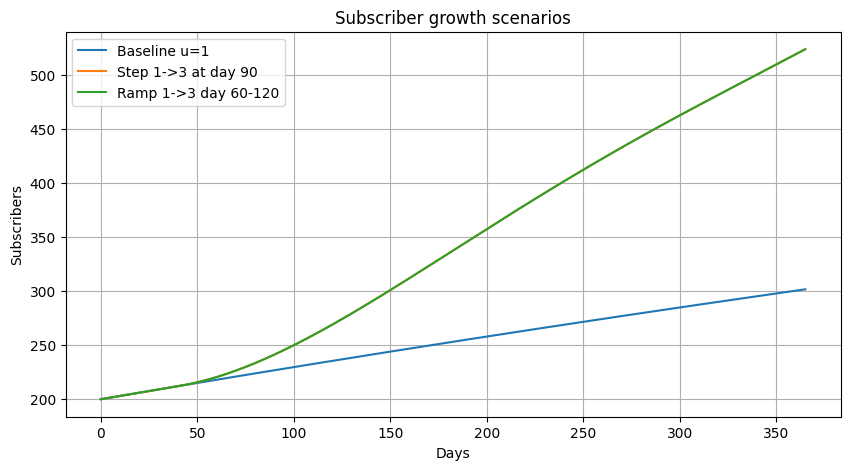

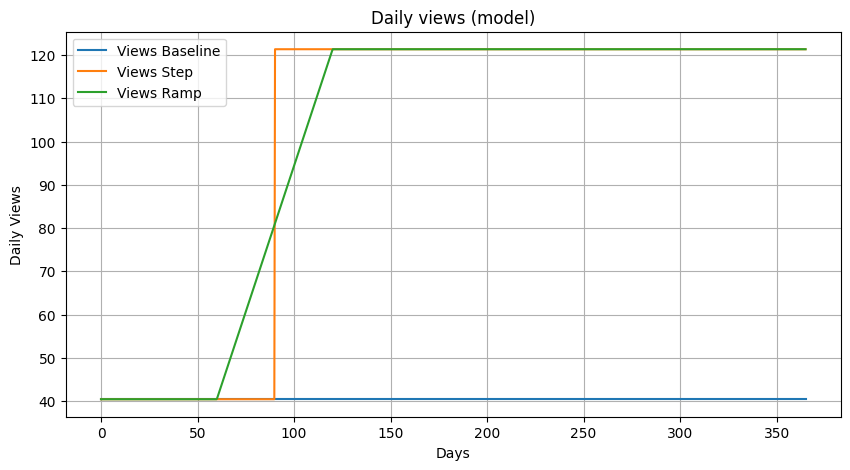

In [10]:
# Run baseline and scenarios
S0 = 200.0
t_b, S_b, V_b = simulate(u_const(1.0), S0=S0)
t_s, S_s, V_s = simulate(u_step(1.0,3.0,90.0), S0=S0)
t_r, S_r, V_r = simulate(u_ramp(1.0,3.0,60.0,120.0), S0=S0)

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(t_b, S_b, label='Baseline u=1')
plt.plot(t_s, S_s, label='Step 1->3 at day 90')
plt.plot(t_r, S_r, label='Ramp 1->3 day 60-120')
plt.xlabel('Days'); plt.ylabel('Subscribers'); plt.title('Subscriber growth scenarios'); plt.legend(); plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t_b, V_b, label='Views Baseline')
plt.plot(t_s, V_s, label='Views Step')
plt.plot(t_r, V_r, label='Views Ramp')
plt.xlabel('Days'); plt.ylabel('Daily Views'); plt.title('Daily views (model)'); plt.legend(); plt.grid(True)
plt.show()

In [11]:
from scipy.optimize import fsolve
def steady_state_S(u_val):
    def eq(S): return p_conv * views_model(u_val, S) - mu * S
    S_guess = max(100.0, (p_conv * k * u_val)/mu)  # heuristic guess
    S_star, = fsolve(eq, S_guess)
    return S_star

u_values = [0.5, 1.0, 2.0, 3.0, 5.0]
ss = [(u, steady_state_S(u)) for u in u_values]
ss

[(0.5, np.float64(404.42485365129687)),
 (1.0, np.float64(808.8757577887401)),
 (2.0, np.float64(1617.8366178130057)),
 (3.0, np.float64(2426.854777196488)),
 (5.0, np.float64(4045.001499536549))]

In [12]:
# Example: sample 20 random channels that have uploads_per_day non-null
if 'uploads_per_day' in df_small.columns and df_small['uploads_per_day'].notnull().sum()>20:
    sample = df_small.dropna(subset=['uploads_per_day','subscribers']).sample(20, random_state=1)
    comparisons = []
    for idx,row in sample.iterrows():
        u_est = float(row['uploads_per_day'])
        S0_sample = max(10.0, float(row['subscribers'])/10.0)  # initial guess
        t, S_sim, V_sim = simulate(u_const(u_est), S0=S0_sample, days=365)
        S_end = S_sim[-1]
        comparisons.append({'channel_idx': idx, 'u_est':u_est, 'subs_actual': row['subscribers'], 'subs_model_1yr': S_end})
    import pandas as pd
    comp_df = pd.DataFrame(comparisons)
    comp_df[['channel_idx','u_est','subs_actual','subs_model_1yr']]
else:
    print('Tidak cukup data uploads_per_day di dataset untuk membandingkan secara langsung. Anda dapat menambah pengolahan data atau memilih subset lain.')